In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv', sep=';', header=None)
df.columns = df.iloc[0]
df=df.drop(df.index[0])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

In [4]:
counts = []

for i in df.columns:
    counts.append(df[i].value_counts())

Five Features:
Passasjerer_ombord, Fylke, Linjetype, Linjeretning, område


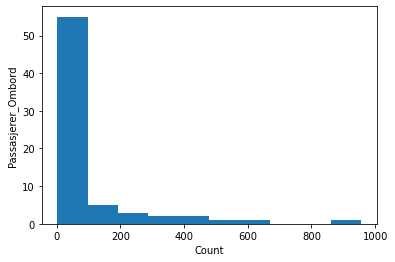

In [5]:
Passasjerer_Ombord = counts[-1]

plt.hist(Passasjerer_Ombord)
plt.xlabel('Count')
plt.ylabel('Passasjerer_Ombord')
plt.rc('font')
plt.show()

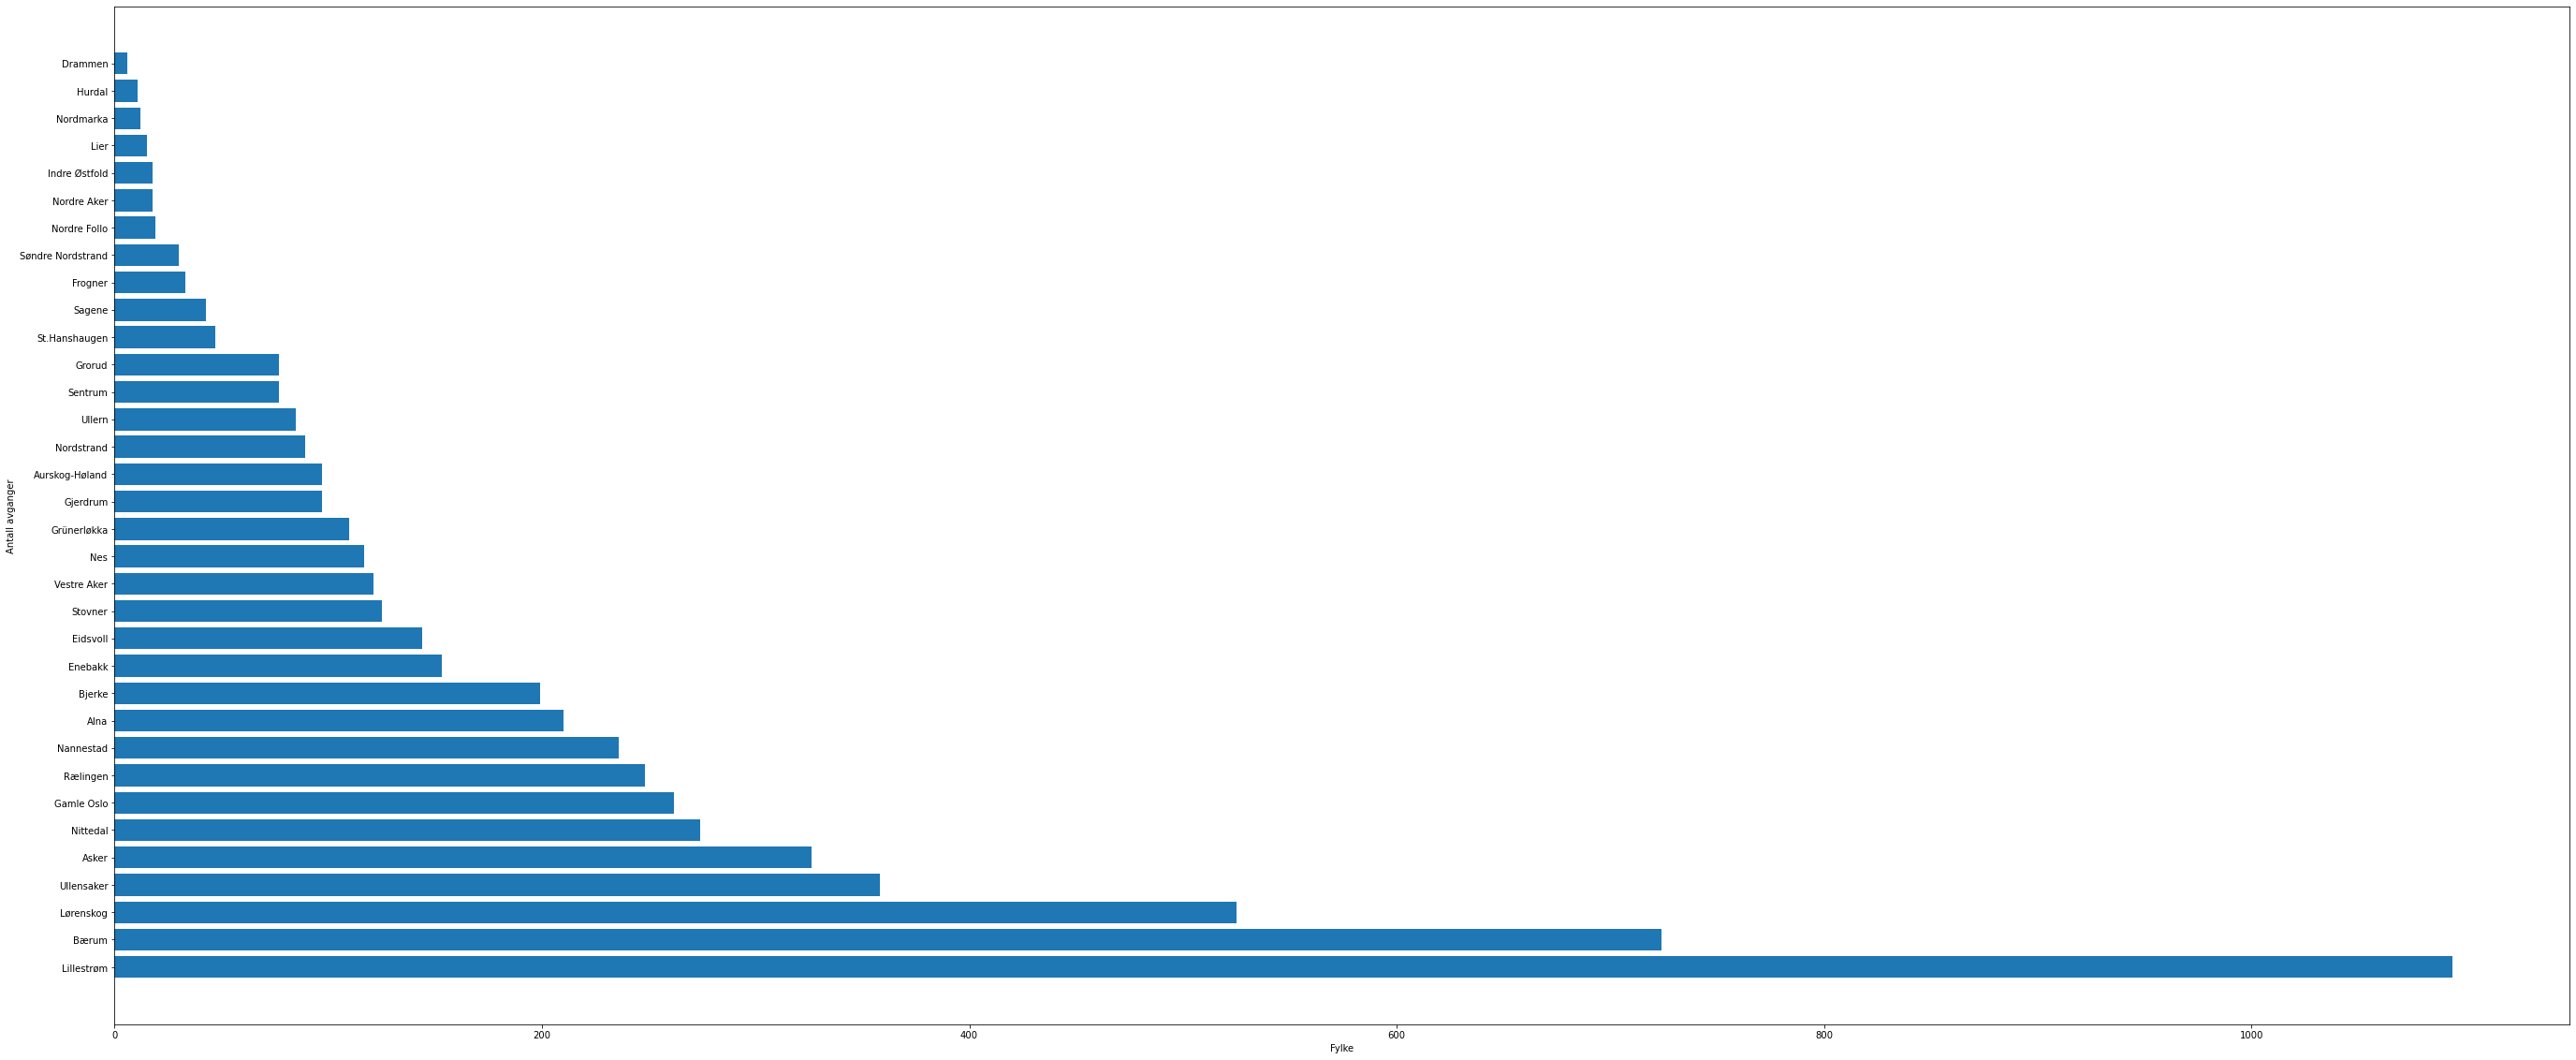

In [6]:
fylke = counts[4]
fylke_counts = [x for x in fylke]



plt.figure(figsize=(47, 20))
plt.barh(width=fylke_counts, y=fylke.index)
plt.xlabel('Fylke')
plt.ylabel('Antall avganger')
plt.rc('font', **font)
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


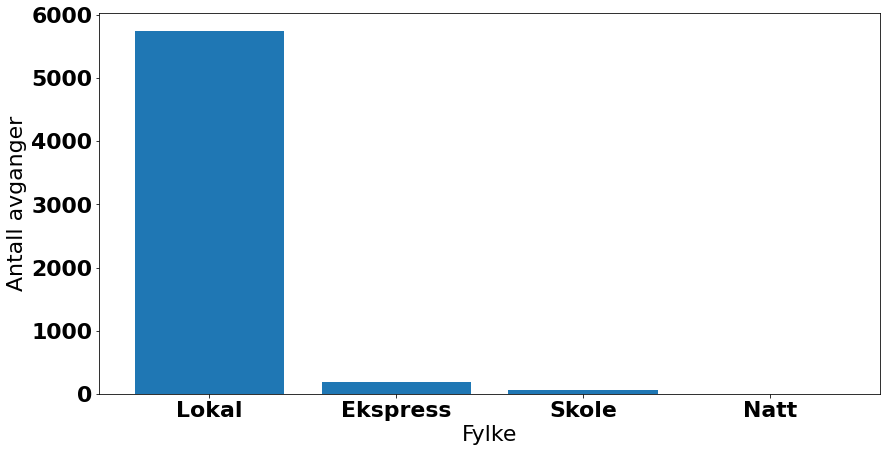

In [7]:
linjetype = counts[7]
linjetype_counts = [x for x in linjetype]



plt.figure(figsize=(14, 7))
plt.bar(height=linjetype_counts, x=linjetype.index)
plt.xlabel('Fylke')
plt.ylabel('Antall avganger')
plt.rc('font', **font)
plt.show()

([<matplotlib.patches.Wedge at 0x19e66a82790>,
 [Text(-0.02764316099622886, 1.0996526068036836, '0'),
  Text(0.027643263953136023, -1.0996526042155392, '1')])

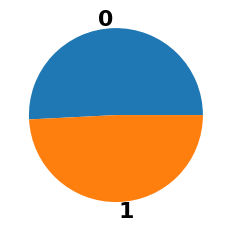

In [8]:
linjeretning = counts[10]
linjeretning_counts = [x for x in linjeretning]

labels = '0', '1'
plt.rc('font')
plt.pie(x=linjeretning_counts, labels=labels)

In [25]:
kjøretøykapasitet=counts[15]
listsd = [x for x in kjøretøykapasitet]
counts, bins = np.histogram(kjøretøykapasitet)
plt.hist(bins[:-1], bins, weights=counts)
plt.rc('font')
plt.show()


TypeError: 'Series' object is not callable

In [23]:
listsd

[1805,
 791,
 690,
 492,
 475,
 452,
 398,
 205,
 193,
 174,
 89,
 68,
 45,
 45,
 39,
 34,
 4,
 1]